# Movie reviews: Binary classification
Il **Word embedding** è un modello che ci permette di generare una serie di vettori (embedding vectors) ognuno dei quali quantifica una caratteristica delle parole. Classificheremo le recensioni  positive o negative usando il Word Embedding

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/nlp/imdb.jpg" width="1100">


In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb

vocab_size = 10000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Numero di esempi nel train set: %d" % len(X_train))
print("Numero di esempi nel test set: %d" % len(X_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Numero di esempi nel train set: 25000
Numero di esempi nel test set: 25000


In [2]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

Ogni riga della lista con le features corrisponde ad una frase, ogni colonna contiene l'indice di una parola all'interno del vocabolario dell'intero corpus di testo. Il vettore con il target contiene un unico valore che può essere 0 per una recensione negativa o 1 per una recensione positiva.<br>
Definiamo una funzione che ci permette di ricostruire la frase partendo dagli indici, per farlo abbiamo bisogno del vocabolario che mappa le parole agli indici, possiamo ottenerlo con il metodo *.get_word_index()*.
<br>
**NOTA BENE**
<br>
Gli indici delle parole hanno un'offset di 3, quindi per ottenere l'indice corretto per il vocabolario dovremo sottrarre 3 all'indice della parola contenuto nella frase.

In [3]:
word_index = imdb.get_word_index()
index_word = dict([(value, key) for (key, value) in word_index.items()])

def vec_to_text(x):
  text = [index_word.get(i-3,'?') for i in x]
  return " ".join(text)

vec_to_text(X_test[0])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


"? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss"

Ovviamente le recensioni avranno lunghezza differente, calcoliamo la lunghezza della più lunga e della più corta.

In [ ]:
longest_review = max(X_train,key=len)
shortest_review = min(X_train,key=len)

print("La review più lunga ha %d parole" % len(longest_review))
print("La review più corta ha %d parole" % len(shortest_review))

La review più lunga ha 2494 parole
La review più corta ha 11 parole


Per rendere le features un buon input per il nostro modello dobbiamo fare in modo che ogni frase abbia la stessa lunghezza, per farlo possiamo usare la funzione *pad_sequences(text)* di keras, che riduce tutte le frasi ad una lunghezza prefissata troncando quelle troppo lunghe e aggiungendo degli zeri a quelle troppo brevi. Usiamo una lunghezza comune di 50 parole.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/nlp/padded.png" width="600">



### Pad sequence

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 50

X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

X_train.shape

(25000, 50)

In [9]:
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32], dtype=int32)

In [10]:
len(X_train[0])

50

In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_train
# we need Dummy TARGET!! [0,1] or [1,0]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

## Embedding --> Word2Vect --Nspace

In fact, the output vectors are not computed from the input using any mathematical operation. Instead, each input integer is used as the index to access a table that contains all possible vectors. That is the reason why you need to specify the size of the vocabulary as the first argument (so the table can be initialized).

The most common application of this layer is for text processing. Let's see a simple example. Our training set consists only of two phrases:

- "Hope to see you soon"  -->  [0, 1, 2, 3, 4]

- "Nice to see you again" -->  [5, 1, 2, 3, 6]

Now imagine we want to train a network whose first layer is an embedding layer. In this case, we should initialize it as follows:


In [ ]:
# Embedding Turns positive integers (indexes) into dense vectors of fixed size,
# but WHY?

# More in-depth explanation:
# I believe it's related to the recent Word2Vec innovation in natural language processing.
# Roughly, Word2Vec means our vocabulary is discrete and we will learn an map which will embed
# each word into a continuous vector space. Using this vector space representation will allow
# us to have a continuous, distributed representation of our vocabulary words

# output_dim = This is the size of the vector space in which words will be embedded.
#              It defines the size of the output vectors from this layer for each word.
#              (how many compnenet?)

#  output_dim = 2
# e.g. [[4], [20]] --> [[0.25, 0.1], [0.6, -0.2]]

# Embedding(vocab_size, output_dim, input_length=5) ##
# Embedding(7, 2, input_length=5) ##

The first argument (7) is the number of distinct words in the training set. The second argument (2) indicates the size of the embedding vectors. The input_length argument, of course, determines the size of each input sequence.

Once the network has been trained, we can get the weights of the embedding layer, which in this case will be of size (7, 2) and can be thought as the table used to map integers to embedding vectors:

| index      | Embedding |
| ---------  | --------- |
| 0          | [1.2, 3.1]|
| 1          | [0.1, 4.2]|
| 2          | [1.0, 3.1]|
| 3          | [0.3, 2.1]|
| 4          | [2.2, 1.4]|
| 5          | [0.7, 1.7]|
| 6          | [4.1, 2.0]|


In [ ]:
##So according to these embeddings, our second training phrase will be represented as:

#"Nice to see you again" --> [5, 1, 2, 3, 6]
#[[0.7, 1.7], [0.1, 4.2], [1.0, 3.1], [0.3, 2.1], [4.1, 2.0]]

https://medium.com/@kadircanercetin/intuitive-understanding-of-word-embeddings-with-keras-6435fe92a57b

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN,LSTM
from tensorflow.keras.layers import Dense

maxlen = 50
output_dim = 50

model = Sequential()

model.add(Embedding(vocab_size, output_dim, input_length=maxlen))
# model.add(SimpleRNN(32))
# #model.add(LSTM(16))
model.add(LSTM(32,dropout=0.5,recurrent_dropout=0.2))

model.add(Dense(2, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy']
              )

In [14]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    validation_split=0.2,
                    epochs=8
                    )

Epoch 1/8
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.6412 - loss: 0.6316 - val_accuracy: 0.7944 - val_loss: 0.4340
Epoch 2/8
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 98ms/step - accuracy: 0.8303 - loss: 0.3896 - val_accuracy: 0.8048 - val_loss: 0.4168
Epoch 3/8
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.8679 - loss: 0.3223 - val_accuracy: 0.8062 - val_loss: 0.4245
Epoch 4/8
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.8835 - loss: 0.2935 - val_accuracy: 0.8036 - val_loss: 0.4388
Epoch 5/8
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.8959 - loss: 0.2643 - val_accuracy: 0.7958 - val_loss: 0.4587
Epoch 6/8
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9094 - loss: 0.2329 - val_accuracy: 0.7974 - val_loss: 0.4815
Epoch 7/8
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9203 - loss: 0.2119 - val_accuracy: 0.7928 - val_loss: 0.5165
Epoch 8/8
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9220 - loss: 0.2086 - val_acc

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

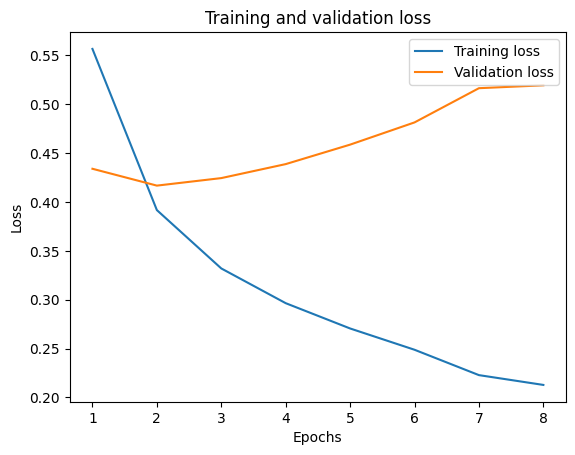

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

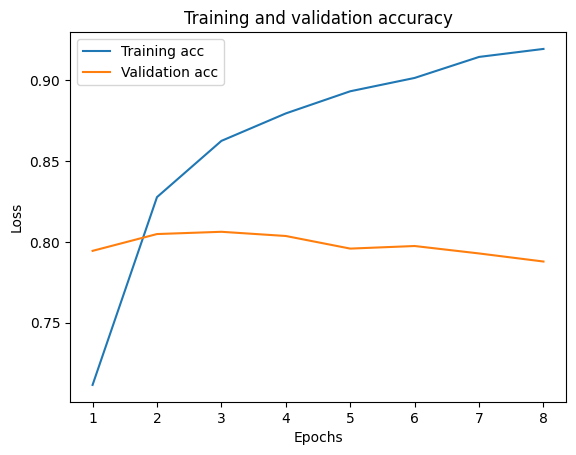

In [17]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
model.save('model1.h5')

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step


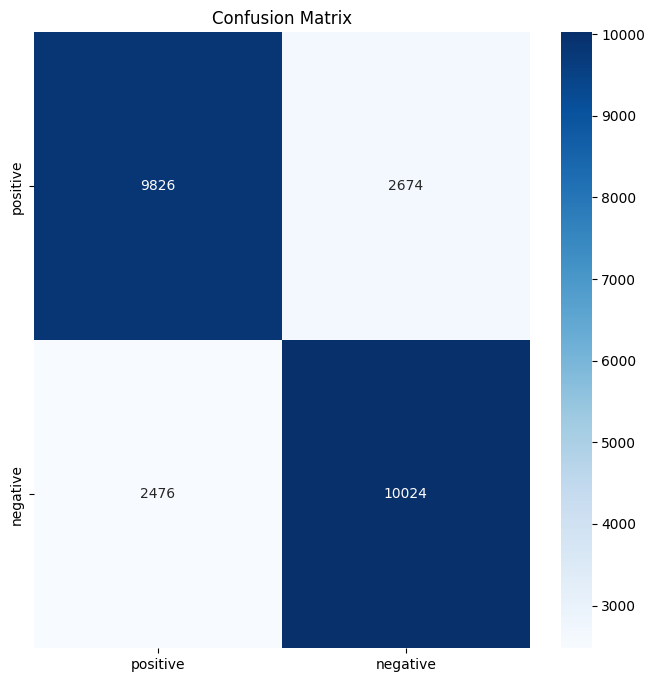

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title('Confusion Matrix')
y_pred = np.argmax(model.predict(X_test),axis=-1)
cm = confusion_matrix(y_test, y_pred)
labels = ['positive','negative']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='Blues');


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     12500
           1       0.79      0.80      0.80     12500

    accuracy                           0.79     25000
   macro avg       0.79      0.79      0.79     25000
weighted avg       0.79      0.79      0.79     25000



In [21]:
# input = np.where((load_model.predict(text_vectorized))> 0.5, 1, 0)
# input

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step


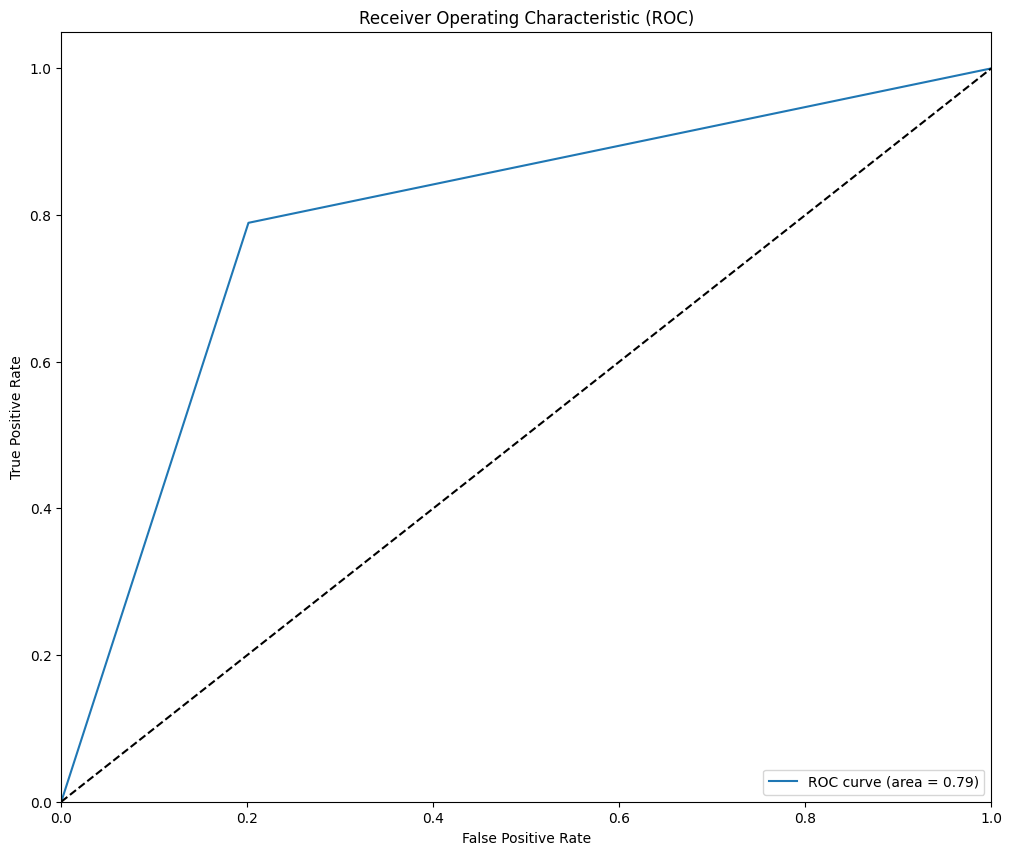

In [22]:
from sklearn.metrics import roc_curve, auc
y_pred = np.argmax(model.predict(X_test),axis=-1)

from sklearn.metrics import roc_curve, auc
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

plot_roc(y_test,y_pred)

## Otteniamo gli embedding
Se volessimo conoscere gli embedding che il modello genera per una determinata frase possiamo farlo creando un nuovo modello che da in output l'output dell'embedding che abbiamo addestrato. Keras ci da la possibilità di accedere ai singoli strati di un modello utilizzato l'attributo *.layers*

In [23]:
model.layers[0]

<Embedding name=embedding, built=True>

In [ ]:
#deprecated from TF2.17
from tensorflow.keras.models import Model
embedding_model = Model(inputs=model.input, outputs=model.layers[0].output)

In [ ]:
x = np.array([X_test[0]])

y_pred = embedding_model.predict(x)
y_pred

1/1 [==============================] - 0s 35ms/step


array([[[-0.05503777,  0.05405614, -0.04418338, ..., -0.10995059,
         -0.06647689, -0.06949788],
        [ 0.04928859, -0.04760788,  0.04740749, ...,  0.01617671,
          0.04633598,  0.03710781],
        [ 0.01180517, -0.00478588,  0.02345197, ..., -0.0033152 ,
         -0.0055969 ,  0.01744072],
        ...,
        [ 0.02765095, -0.01394671, -0.02666765, ...,  0.01761826,
          0.02155473,  0.00344495],
        [ 0.01486637, -0.0289918 , -0.01278795, ..., -0.01209782,
          0.011678  , -0.00028909],
        [-0.05199485, -0.03986752,  0.05505459, ..., -0.01900368,
          0.03319978,  0.05114361]]], dtype=float32)

In [ ]:
len(y_pred[0])

50